In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from datafold.pcfold import TSCDataFrame, GaussianKernel
from datafold.dynfold import DMDFull
from datafold.dynfold.transform import TSCRadialBasis, TSCPolynomialFeatures
from datafold.appfold import EDMD
from pydiffmap import diffusion_map as dm
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.utils.plot import plot_pairwise_eigenvector
from datafold.dynfold import LocalRegressionSelection

In [4]:
df = pd.read_csv('datasets/MI_timesteps.txt', sep=" ")
df = df.drop(['timeStep'], axis=1)
df = df = df.iloc[1000:]

In [5]:
tsc_data = TSCDataFrame.from_single_timeseries(df)

In [6]:
tsc_data

feature   areaDensityCounting-PID5  areaDensityCounting-PID6  \
ID time                                                        
0  1000                          0                         2   
   1001                          0                         2   
   1002                          0                         2   
   1003                          0                         2   
   1004                          0                         2   
...                            ...                       ...   
   14996                         0                        10   
   14997                         0                        10   
   14998                         0                        10   
   14999                         0                        10   
   15000                         0                        11   

feature   areaDensityCounting-PID7  areaDensityCounting-PID8  \
ID time                                                        
0  1000                         97                         7   
   1001                         96                         7   
   1002                         95                         6   
   1003                         94                         6   
   1004                         92                         6   
...                            ...                       ...   
   14996                        95                         4   
   14997                        94                         3   
   14998                        93                         3   
   14999                        93                         3   
   15000                        91                         2   

feature   areaDensityCounting-PID9  areaDensityCounting-PID10  \
ID time                                                         
0  1000                          0                          0   
   1001                          0                          0   
   1002                          0                          0   
   1003                          0                          0   
   1004                          0                          0   
...                            ...                        ...   
   14996                         0                          0   
   14997                         0                          0   
   14998                         0                          1   
   14999                         0                          1   
   15000                         0                          0   

feature   areaDensityCounting-PID11  areaDensityCounting-PID12  \
ID time                                                          
0  1000                           5                          1   
   1001                           5                          1   
   1002                           5                          0   
   1003                           4                          1   
   1004                           5                          0   
...                             ...                        ...   
   14996                          2                          1   
   14997                          3                          1   
   14998                          2                          1   
   14999                          3                          1   
   15000                          1                          0   

feature   areaDensityCounting-PID13  
ID time                              
0  1000                          43  
   1001                          45  
   1002                          46  
   1003                          46  
   1004                          46  
...                             ...  
   14996                         39  
   14997                         39  
   14998                         40  
   14999                         41  
   15000                         42  

[14001 rows x 9 columns]

## DMD: Identity Dictionary

In [7]:
dmd = DMDFull().fit(X=tsc_data, store_koopman_matrix=True)  # must be TSCDataFrame
dmd_values = dmd.predict(tsc_data.initial_states(), time_values=None)

# Will be a red line in the plot
#dmd_values_oos = dmd.predict(np.array([-1.8, 2]), time_values=np.linspace(0, 100, 1000))

print("Data snipped with predicted time series data")
dmd_values

Data snipped with predicted time series data


feature   areaDensityCounting-PID5  areaDensityCounting-PID6  \
ID time                                                        
0  1000              -3.319567e-14                  2.000000   
   1001              -1.224676e-01                  2.244369   
   1002              -1.859633e-01                  2.503428   
   1003              -2.071541e-01                  2.772768   
   1004              -1.978603e-01                  3.049641   
...                            ...                       ...   
   14996              1.528385e+01                 59.823557   
   14997              1.528357e+01                 59.822446   
   14998              1.528329e+01                 59.821335   
   14999              1.528300e+01                 59.820225   
   15000              1.528272e+01                 59.819114   

feature   areaDensityCounting-PID7  areaDensityCounting-PID8  \
ID time                                                        
0  1000                  97.000000                  7.000000   
   1001                  96.297722                  6.874682   
   1002                  95.650442                  6.720674   
   1003                  95.039919                  6.547123   
   1004                  94.453548                  6.360357   
...                            ...                       ...   
   14996                  9.839230                  3.221742   
   14997                  9.839047                  3.221682   
   14998                  9.838864                  3.221622   
   14999                  9.838682                  3.221562   
   15000                  9.838499                  3.221503   

feature   areaDensityCounting-PID9  areaDensityCounting-PID10  \
ID time                                                         
0  1000              -1.557868e-14               2.498002e-16   
   1001               3.177831e-03               4.105778e-02   
   1002               6.680682e-03               6.415351e-02   
   1003               1.041067e-02               7.439983e-02   
   1004               1.430464e-02               7.544100e-02   
...                            ...                        ...   
   14996              7.772877e-01               1.297591e+00   
   14997              7.772733e-01               1.297567e+00   
   14998              7.772589e-01               1.297542e+00   
   14999              7.772444e-01               1.297518e+00   
   15000              7.772300e-01               1.297494e+00   

feature   areaDensityCounting-PID11  areaDensityCounting-PID12  \
ID time                                                          
0  1000                    5.000000                   1.000000   
   1001                    4.377787                   0.749011   
   1002                    3.915899                   0.577694   
   1003                    3.571903                   0.461057   
   1004                    3.314712                   0.381862   
...                             ...                        ...   
   14996                   0.339481                   0.058524   
   14997                   0.339475                   0.058523   
   14998                   0.339469                   0.058522   
   14999                   0.339462                   0.058521   
   15000                   0.339456                   0.058520   

feature   areaDensityCounting-PID13  
ID time                              
0  1000                   43.000000  
   1001                   43.854051  
   1002                   44.574112  
   1003                   45.198592  
   1004                   45.754639  
...                             ...  
   14996                  35.267746  
   14997                  35.267092  
   14998                  35.266437  
   14999                  35.265782  
   15000                  35.265127  

[14001 rows x 9 columns]

Original Data:

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='None,ID'>

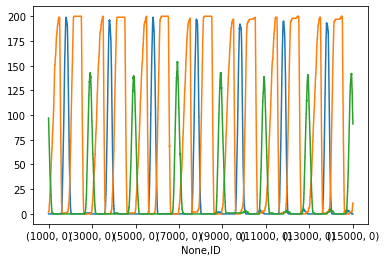

In [8]:
df['areaDensityCounting-PID5'].plot()
df['areaDensityCounting-PID6'].plot()
df['areaDensityCounting-PID7'].plot()

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='None,ID'>

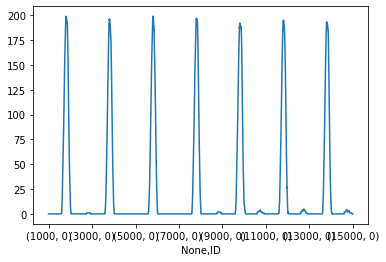

In [9]:
df['areaDensityCounting-PID5'].plot()

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='None,ID'>

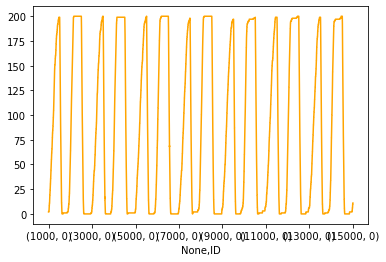

In [10]:
df['areaDensityCounting-PID6'].plot(color = 'orange')

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='None,ID'>

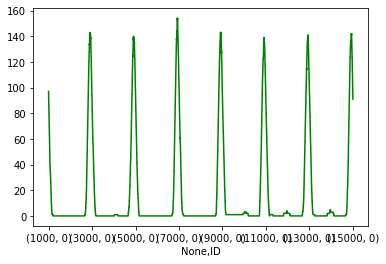

In [11]:
df['areaDensityCounting-PID7'].plot(color = 'green')

Predictions using identity dictionary:

<AxesSubplot:xlabel='time'>

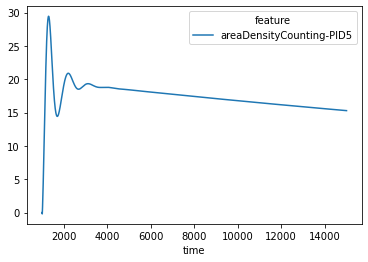

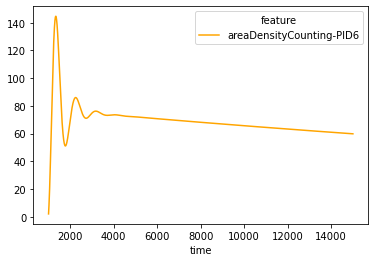

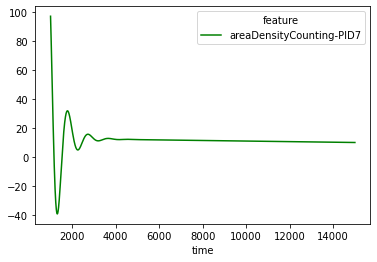

In [12]:
dmd_values['areaDensityCounting-PID5'].plot()
dmd_values['areaDensityCounting-PID6'].plot(color = 'orange')
dmd_values['areaDensityCounting-PID7'].plot(color = 'green')


## EDMD: Polynomial feature dictionary

In [13]:
dict_step = [
    (
        "polynomial",
        TSCPolynomialFeatures(degree=2),
    )
]


edmd_poly = EDMD(dict_steps=dict_step, include_id_state=True).fit(X=tsc_data)
edmd_poly_values = edmd_poly.predict(tsc_data.initial_states())

In [14]:
# access models in the dictionary, the name was given in "dict_step" above
print(edmd_poly.named_steps["polynomial"])

print("")
print("polynomial degrees for data")
print(edmd_poly.named_steps["polynomial"].powers_)

print("")
print("Dictionary space values:")
edmd_p = edmd_poly.transform(tsc_data)
edmd_rec = edmd_poly.reconstruct(tsc_data)
edmd_rec

TSCPolynomialFeatures(degree=2, include_bias=False, include_first_order=False,
                      interaction_only=False)

polynomial degrees for data
[[2 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1]
 [0 2 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 1]
 [0 0 2 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0]
 [0 0 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 1]
 [0 0 0 2 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 1]
 [0 0 0 0 2 0 0 0 0]
 [0 0 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 2 0 0]
 [0 0 

feature   areaDensityCounting-PID5  areaDensityCounting-PID6  \
ID time                                                        
0  1000               1.560350e-12                  2.000000   
   1001              -4.304853e-02                  1.989705   
   1002              -8.371951e-02                  2.032753   
   1003              -1.238735e-01                  2.097710   
   1004              -1.631294e-01                  2.172461   
...                            ...                       ...   
   14996              2.231223e+01                 85.992842   
   14997              2.231223e+01                 85.992818   
   14998              2.231222e+01                 85.992795   
   14999              2.231221e+01                 85.992771   
   15000              2.231221e+01                 85.992747   

feature   areaDensityCounting-PID7  areaDensityCounting-PID8  \
ID time                                                        
0  1000                  97.000000                  7.000000   
   1001                  96.502116                  6.806742   
   1002                  95.888221                  6.604615   
   1003                  95.251239                  6.413092   
   1004                  94.606386                  6.233242   
...                            ...                       ...   
   14996                 15.457666                  5.109202   
   14997                 15.457662                  5.109201   
   14998                 15.457658                  5.109200   
   14999                 15.457653                  5.109198   
   15000                 15.457649                  5.109197   

feature   areaDensityCounting-PID9  areaDensityCounting-PID10  \
ID time                                                         
0  1000               2.558023e-14              -2.521285e-12   
   1001              -1.134816e-02               2.179088e-01   
   1002              -1.737986e-02               3.434843e-01   
   1003              -2.120681e-02               4.352037e-01   
   1004              -2.299917e-02               5.096457e-01   
...                            ...                        ...   
   14996              1.218171e+00               1.927912e+00   
   14997              1.218170e+00               1.927911e+00   
   14998              1.218170e+00               1.927911e+00   
   14999              1.218170e+00               1.927910e+00   
   15000              1.218169e+00               1.927910e+00   

feature   areaDensityCounting-PID11  areaDensityCounting-PID12  \
ID time                                                          
0  1000                    5.000000                   1.000000   
   1001                    4.031685                   0.774844   
   1002                    3.519442                   0.701522   
   1003                    3.201863                   0.676471   
   1004                    2.995627                   0.664964   
...                             ...                        ...   
   14996                   0.535305                   0.090355   
   14997                   0.535305                   0.090355   
   14998                   0.535305                   0.090355   
   14999                   0.535305                   0.090355   
   15000                   0.535305                   0.090355   

feature   areaDensityCounting-PID13  
ID time                              
0  1000                   43.000000  
   1001                   43.605240  
   1002                   44.227285  
   1003                   44.856544  
   1004                   45.492192  
...                             ...  
   14996                  54.171662  
   14997                  54.171647  
   14998                  54.171632  
   14999                  54.171617  
   15000                  54.171602  

[14001 rows x 9 columns]

Original data

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='None,ID'>

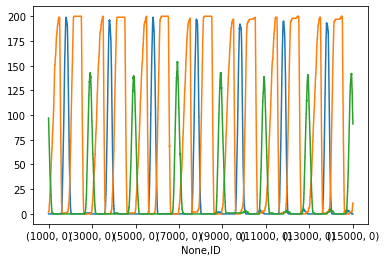

In [15]:
df['areaDensityCounting-PID5'].plot()
df['areaDensityCounting-PID6'].plot()
df['areaDensityCounting-PID7'].plot()

Predictions using polynomial feature dictionary

<AxesSubplot:xlabel='time'>

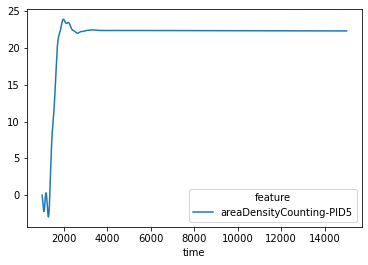

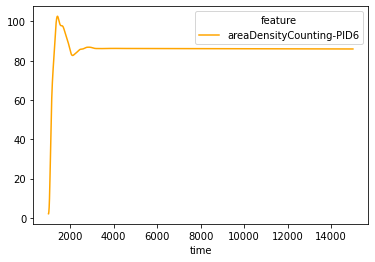

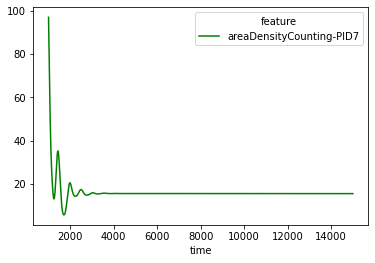

In [16]:
edmd_rec['areaDensityCounting-PID5'].plot()
edmd_rec['areaDensityCounting-PID6'].plot(color = 'orange')
edmd_rec['areaDensityCounting-PID7'].plot(color = 'green')

In [17]:
X_pcm = pfold.PCManifold(tsc_data)
X_pcm.optimize_parameters()

print(f'epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}')

epsilon=5.320107403314834, cut-off=9.899494936611665


In [18]:
dmap = dfold.DiffusionMaps(kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
                           n_eigenpairs=10,
                           dist_kwargs=dict(cut_off=X_pcm.cut_off))
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

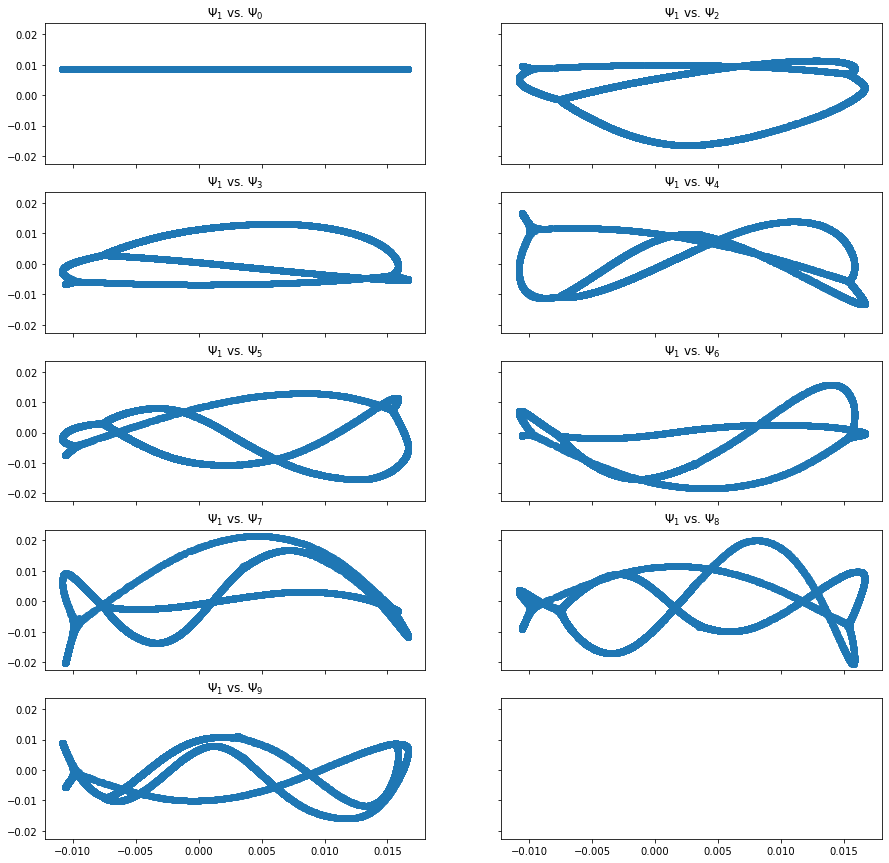

In [19]:
plot_pairwise_eigenvector(eigenvectors=dmap.eigenvectors_, n=1,
                          fig_params=dict(figsize=[15,15]))

In [20]:
print(np.shape(evecs))

(14001, 10)


In [21]:
evecs_1_2 = evecs[:, [1, 2]]

In [22]:
print(np.shape(evecs_1_2))

(14001, 2)


In [23]:
df_eig = pd.DataFrame(evecs_1_2)
df_eig

,0,1
0,0.000083,-0.015441
1,-0.000006,-0.015372
2,-0.000063,-0.015325
3,-0.000088,-0.015305
4,-0.000153,-0.015250
...,...,...
13996,0.000311,-0.015617
13997,0.000277,-0.015592
13998,0.000208,-0.015538
13999,0.000187,-0.015521


In [24]:
tsc_data_eig = TSCDataFrame.from_single_timeseries(df_eig)
tsc_data_eig

feature          0         1
ID time                     
0  0      0.000083 -0.015441
   1     -0.000006 -0.015372
   2     -0.000063 -0.015325
   3     -0.000088 -0.015305
   4     -0.000153 -0.015250
...            ...       ...
   13996  0.000311 -0.015617
   13997  0.000277 -0.015592
   13998  0.000208 -0.015538
   13999  0.000187 -0.015521
   14000  0.000047 -0.015407

[14001 rows x 2 columns]

In [25]:
centerss = tsc_data_eig.sample(n = 100)
centerss

feature          0         1
ID time                     
0  41    -0.002406 -0.012617
   115   -0.006155 -0.005385
   842   -0.010594  0.009628
   999   -0.008791 -0.000034
   1066  -0.004121  0.002079
...            ...       ...
   13555  0.013423  0.011364
   13589  0.015821  0.008455
   13691  0.016570  0.003234
   13737  0.016527  0.001410
   13807  0.012481 -0.007531

[100 rows x 2 columns]

In [31]:
dict_step = [("rbf", TSCRadialBasis(kernel=GaussianKernel(epsilon=0.17)))]

edmd_rbf = EDMD(dict_steps=dict_step, include_id_state=True).fit(X=tsc_data_eig)  # Note that the "extended" part is in the transformations
edmd_rbf_values = edmd_rbf.predict(tsc_data_eig.initial_states())

len_koopman_matrix = len(edmd_rbf.named_steps['dmd'].eigenvectors_right_)
print(f"shape of Koopman matrix: {len_koopman_matrix} x {len_koopman_matrix}")
edmd_rbf.transform(tsc_data_eig)

C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\datafold\dynfold\dmd.py:673: UserWarning: There are more observables than snapshots. The current implementation favors more snapshots than obserables. This may result in a bad computational performance.
  "There are more observables than snapshots. The current implementation "
C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\datafold\dynfold\dmd.py:687: UserWarning: Shift matrix (shape=(14003, 14003)) has not full rank (=14001), falling back to least squares solution. The sum of residuals is: 0.0
  f"Shift matrix (shape={G.shape}) has not full rank (={rank}), falling "
C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\datafold\dynfold\dmd.py:236: RuntimeWarning: divide by zero encountered in log
  omegas = np.log(eigenvalues.astype(np.complex)) / time_delta
C:\Users\golde\Anaconda3\envs\MLDL\lib\site-packages\datafold\dynfold\dmd.py:236: RuntimeWarning: invalid value encountered in true_divide
  omegas = np.log(eigenvalues.ast

shape of Koopman matrix: 14003 x 14003


feature          0         1  rbf0  rbf1      rbf2      rbf3      rbf4  \
ID time                                                                  
0  0      0.000083 -0.015441   1.0   1.0  1.000000  1.000000  1.000000   
   1     -0.000006 -0.015372   1.0   1.0  1.000000  1.000000  1.000000   
   2     -0.000063 -0.015325   1.0   1.0  1.000000  1.000000  1.000000   
   3     -0.000088 -0.015305   1.0   1.0  1.000000  1.000000  1.000000   
   4     -0.000153 -0.015250   1.0   1.0  1.000000  1.000000  1.000000   
...            ...       ...   ...   ...       ...       ...       ...   
   13996  0.000311 -0.015617   1.0   1.0  0.999999  0.999999  0.999999   
   13997  0.000277 -0.015592   1.0   1.0  0.999999  0.999999  0.999999   
   13998  0.000208 -0.015538   1.0   1.0  1.000000  1.000000  0.999999   
   13999  0.000187 -0.015521   1.0   1.0  1.000000  1.000000  0.999999   
   14000  0.000047 -0.015407   1.0   1.0  1.000000  1.000000  1.000000   

feature       rbf5      rbf6      rbf7  ...  rbf13991  rbf13992  rbf13993  \
ID time                                 ...                                 
0  0      0.999999  0.999999  0.999999  ...  0.999999  0.999999  0.999999   
   1      1.000000  1.000000  0.999999  ...  0.999999  0.999999  0.999999   
   2      1.000000  1.000000  0.999999  ...  0.999998  0.999999  0.999999   
   3      1.000000  1.000000  1.000000  ...  0.999998  0.999998  0.999999   
   4      1.000000  1.000000  1.000000  ...  0.999998  0.999998  0.999998   
...            ...       ...       ...  ...       ...       ...       ...   
   13996  0.999998  0.999998  0.999998  ...  1.000000  1.000000  1.000000   
   13997  0.999999  0.999998  0.999998  ...  1.000000  1.000000  1.000000   
   13998  0.999999  0.999999  0.999998  ...  0.999999  1.000000  1.000000   
   13999  0.999999  0.999999  0.999998  ...  0.999999  1.000000  1.000000   
   14000  1.000000  0.999999  0.999999  ...  0.999999  0.999999  0.999999   

feature   rbf13994  rbf13995  rbf13996  rbf13997  rbf13998  rbf13999  rbf14000  
ID time                                                                         
0  0      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000       1.0  
   1      0.999999  0.999999  1.000000  1.000000  1.000000  1.000000       1.0  
   2      0.999999  0.999999  0.999999  0.999999  1.000000  1.000000       1.0  
   3      0.999999  0.999999  0.999999  0.999999  1.000000  1.000000       1.0  
   4      0.999999  0.999999  0.999999  0.999999  0.999999  0.999999       1.0  
...            ...       ...       ...       ...       ...       ...       ...  
   13996  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000       1.0  
   13997  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000       1.0  
   13998  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000       1.0  
   13999  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000       1.0  
   14000  0.999999  0.999999  1.000000  1.000000  1.000000  1.000000       1.0  

[14001 rows x 14003 columns]

In [33]:
edmd_rbf_values

feature    0   1
ID time         
0  0     NaN NaN
   1     NaN NaN
   2     NaN NaN
   3     NaN NaN
   4     NaN NaN
...       ..  ..
   13996 NaN NaN
   13997 NaN NaN
   13998 NaN NaN
   13999 NaN NaN
   14000 NaN NaN

[14001 rows x 2 columns]